##### 카카오 API

In [2]:
# 카카오 다음 이미지 검색 API 예제
import os
import sys
import urllib.request # 웹 요청을 전송하고 응답을 수신하는 모듈 (브라우저 역할)

# 서버로 전송하는 데이터
client_id = "81f44d821f5434c7657e027aae509fbb"

encText = urllib.parse.quote("고양이") # "문자열" 변환 과정
# get 방식 전송 데이터 구성
url = "https://dapi.kakao.com/v2/search/image?query={0}".format(encText) # 변환된 문자열을 가지고 검색한 url
request = urllib.request.Request(url)

request.add_header("Authorization","KakaoAK {0}".format(client_id))

response = urllib.request.urlopen(request) # 요청 보내기 + 응답 수신

rescode = response.getcode() # 응답코드 읽기
if(rescode==200): # 정상 응답이라면
    response_body = response.read() # 응답 데이터 읽기
    print(response_body.decode('utf-8')) # binary 데이터를 text 데이터로 변환 여기서는 utf-8
else:
     print("Error Code:" + rescode)

# 네이버 검색 API 예제 - 블로그 검색
# import os
# import sys
# import urllib.request
# client_id = "ZbUpN1joJ5SzDquoVzm9"
# client_secret = "7Q6FQ64qWW"
# encText = urllib.parse.quote("소년이온다")
# url = "https://openapi.naver.com/v1/search/book.json?query={0}&display={1}".format(encText, 50) # JSON 결과
# request = urllib.request.Request(url)
# request.add_header("Authorization","KakaoAK {0}".format(client_id))

# response = urllib.request.urlopen(request)
# rescode = response.getcode()
# if(rescode==200):
#     response_body = response.read()
#     print(response_body.decode('utf-8'))
# else:
#     print("Error Code:" + rescode)


{"documents":[{"collection":"blog","datetime":"2017-08-31T09:00:00.000+09:00","display_sitename":"티스토리","doc_url":"https://binubaguni.tistory.com/116","height":500,"image_url":"https://t1.daumcdn.net/cfile/tistory/999FE63359A5728810","thumbnail_url":"https://search3.kakaocdn.net/argon/130x130_85_c/4QRIxD88kpm","width":357},{"collection":"news","datetime":"2024-02-24T00:01:48.000+09:00","display_sitename":"중앙SUNDAY","doc_url":"http://v.media.daum.net/v/20240224000148735","height":687,"image_url":"https://t1.daumcdn.net/news/202402/24/joongangsunday/20240224000150215efvd.jpg","thumbnail_url":"https://search1.kakaocdn.net/argon/130x130_85_c/ClWMVzfq2oc","width":458},{"collection":"etc","datetime":"2024-09-07T20:23:46.000+09:00","display_sitename":"쇼핑하우","doc_url":"https://shoppinghow.kakao.com/in/product?prodid=D5140891806","height":640,"image_url":"http://shop.daumcdn.net/shophow/p/D5140891806.jpg?ut=20240907202539","thumbnail_url":"https://search4.kakaocdn.net/argon/130x130_85_c/1GOEVZA

In [3]:
print(type( response_body ))

bytes

In [6]:
text_response = response_body.decode('utf-8')
print(type(  text_response  ) ) # 내가 쓰는 데이터 형식 확인
print(text_response)

<class 'str'>
{"documents":[{"collection":"blog","datetime":"2017-08-31T09:00:00.000+09:00","display_sitename":"티스토리","doc_url":"https://binubaguni.tistory.com/116","height":500,"image_url":"https://t1.daumcdn.net/cfile/tistory/999FE63359A5728810","thumbnail_url":"https://search3.kakaocdn.net/argon/130x130_85_c/4QRIxD88kpm","width":357},{"collection":"news","datetime":"2024-02-24T00:01:48.000+09:00","display_sitename":"중앙SUNDAY","doc_url":"http://v.media.daum.net/v/20240224000148735","height":687,"image_url":"https://t1.daumcdn.net/news/202402/24/joongangsunday/20240224000150215efvd.jpg","thumbnail_url":"https://search1.kakaocdn.net/argon/130x130_85_c/ClWMVzfq2oc","width":458},{"collection":"etc","datetime":"2024-09-07T20:23:46.000+09:00","display_sitename":"쇼핑하우","doc_url":"https://shoppinghow.kakao.com/in/product?prodid=D5140891806","height":640,"image_url":"http://shop.daumcdn.net/shophow/p/D5140891806.jpg?ut=20240907202539","thumbnail_url":"https://search4.kakaocdn.net/argon/130x13

##### json -> dict 변환

In [13]:
# json str -> dict
import json

dict_response = json.loads(text_response) # loads가 스트링 문자열을 변환

print(type(dict_response))
dict_response
# print( dict_response )

print(type(dict_response['documents']))
# for item in dict_response['items']:
for idx, item in enumerate(dict_response['documents']):
    # print(type(item))
    print("{0}. {1}".format(idx + 1, item['image_url']))

print(type('documents'))
print(type('image_url'))

<class 'dict'>
<class 'list'>
1. https://t1.daumcdn.net/cfile/tistory/999FE63359A5728810
2. https://t1.daumcdn.net/news/202402/24/joongangsunday/20240224000150215efvd.jpg
3. http://shop.daumcdn.net/shophow/p/D5140891806.jpg?ut=20240907202539
4. https://t1.daumcdn.net/news/202402/25/akn/20240225070103638jeqk.jpg
5. https://blog.kakaocdn.net/dn/bok4uh/btrU44VbtkF/G2aQgGbVFuAvziQZAiugqk/img.jpg
6. https://blog.kakaocdn.net/dn/clntWE/btstC3NTjVS/JYYAyrDx38VYpZDtNV4Vmk/img.jpg
7. https://t1.daumcdn.net/news/202103/26/sportskhan/20210326154226470iwqg.jpg
8. https://t1.daumcdn.net/news/202408/11/ZDNetKorea/20240811100837818cyjh.jpg
9. http://t1.daumcdn.net/news/201602/18/mbn/20160218185726565zoge.jpg
10. https://blog.kakaocdn.net/dn/U28hL/btsE95AgOfI/nCZTka8HAkEgyy8O3IXZck/img.jpg
11. https://blog.kakaocdn.net/dn/oZZxr/btsHWRfL9Kd/KE3zKNpvsde1lJGg4lMeck/img.webp
12. https://blog.kakaocdn.net/dn/dow6hD/btsHSbZ0ndH/ElfJfi6DDIdyTFUImqLTH1/img.webp
13. https://blog.kakaocdn.net/dn/cc1oGj/btsJPTwG

##### 리스트에 담기

In [17]:
# 리스트에 담아보는 작업
# 위를 더 간결하게 표현(같은 결과)

image_url = [ item['image_url'] for item in dict_response['documents']]
# items는 딕셔너리의 문법으로 이걸 쓰면 키 값을 불러온다.
# 키가 items라서 'items'의 값을 불러옴
print(image_url)

['https://t1.daumcdn.net/cfile/tistory/999FE63359A5728810', 'https://t1.daumcdn.net/news/202402/24/joongangsunday/20240224000150215efvd.jpg', 'http://shop.daumcdn.net/shophow/p/D5140891806.jpg?ut=20240907202539', 'https://t1.daumcdn.net/news/202402/25/akn/20240225070103638jeqk.jpg', 'https://blog.kakaocdn.net/dn/bok4uh/btrU44VbtkF/G2aQgGbVFuAvziQZAiugqk/img.jpg', 'https://blog.kakaocdn.net/dn/clntWE/btstC3NTjVS/JYYAyrDx38VYpZDtNV4Vmk/img.jpg', 'https://t1.daumcdn.net/news/202103/26/sportskhan/20210326154226470iwqg.jpg', 'https://t1.daumcdn.net/news/202408/11/ZDNetKorea/20240811100837818cyjh.jpg', 'http://t1.daumcdn.net/news/201602/18/mbn/20160218185726565zoge.jpg', 'https://blog.kakaocdn.net/dn/U28hL/btsE95AgOfI/nCZTka8HAkEgyy8O3IXZck/img.jpg', 'https://blog.kakaocdn.net/dn/oZZxr/btsHWRfL9Kd/KE3zKNpvsde1lJGg4lMeck/img.webp', 'https://blog.kakaocdn.net/dn/dow6hD/btsHSbZ0ndH/ElfJfi6DDIdyTFUImqLTH1/img.webp', 'https://blog.kakaocdn.net/dn/cc1oGj/btsJPTwGKUv/L7IO8eVPAApWL6GBKo3saK/img.png'

##### 데이터프레임 변환

In [18]:
import pandas as pd

df_response = pd.DataFrame(dict_response['documents']) # 데이터 프레임으로 변환
print( type(df_response) ) # 데이터 타입 확인 -> 변환되에서 df로 바뀜.

<class 'pandas.core.frame.DataFrame'>


In [21]:
! pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [22]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------ --- 2.4/2.6 MB 12.3 MB/s eta 0:00:01
   ------------------------------

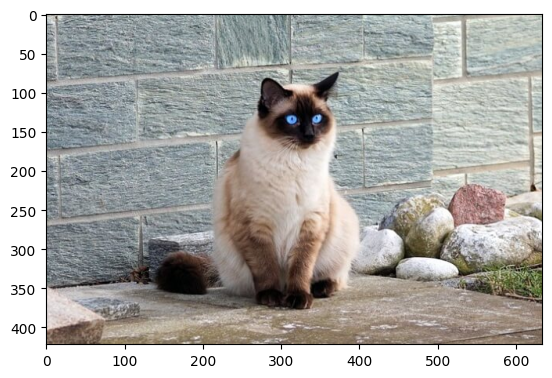

In [32]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import PIL

url = "https://blog.kakaocdn.net/dn/bvP4je/btrqMRcN3xG/sNfXm39Fbo0MHLFqrmO6FK/img.jpg"
# img_array = PIL.Image.open(urllib.request.urlopen(url))
os.system("curl " + url + " > test.jpg")

img = imread('test.jpg')

plt.imshow(img)
plt.show()

In [56]:
print(cv2.__version__)

4.10.0


In [73]:
# import cv2
# import numpy as np
# import urllib.request

# def url_to_image(url):
#   resp = urllib.request.urlopen(url)
#   image = np.asarray(bytearray(resp.read()), dtype='uint8')
#   image = cv2.imdecode(image, cv2.IMREAD_COLOR)

#   return image

# tiger_image = url_to_image('https://bananabearbooks.com/wp-content/uploads/2018/04/tiger-illustration-bananabeabooks.jpg')

# cv2.imshow("tiger_image", image)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


### Kakao API 활용 연습 - 선생님 답 (근데 나한테 어디선가 에러나서 새 파일 만듦)

In [37]:
# 카카오 다음 이미지 검색 API 예제
# curl 터미널에서 사용

import os
import sys
import urllib.request # 웹 요청을 전송하고 응답을 수신하는 모듈 (브라우저 역할)

# 서버로 전송하는 데이터
api_key = "81f44d821f5434c7657e027aae509fbb"
encText = urllib.parse.quote("설현") # "문자열" 변환 과정

# 요청 url + get 방식 전송 데이터 구성
url = "https://dapi.kakao.com/v2/search/image?query={0}&size={1}".format(encText, 50)
request = urllib.request.Request(url)

# header에 데이터 저장
request.add_header("Authorization","KakaoAK {0}".format(api_key))
# request.add_header("Authorization", f"KakaoAK ${api_key}")

response = urllib.request.urlopen(request) # 요청 보내기 + 응답 수신

rescode = response.getcode() # 응답코드 읽기
if(rescode==200): # 정상 응답이라면
    response_body = response.read() # 응답 데이터 읽기
    print(response_body.decode('utf-8')) # binary 데이터를 text 데이터로 변환 여기서는 utf-8
else:
     print("Error Code:" + rescode)

{"documents":[{"collection":"news","datetime":"2021-09-14T23:45:22.000+09:00","display_sitename":"스포츠한국","doc_url":"http://v.media.daum.net/v/20210914234522455","height":540,"image_url":"https://t1.daumcdn.net/news/202109/14/SpoHankook/20210914234523497qmdp.jpg","thumbnail_url":"https://search1.kakaocdn.net/argon/130x130_85_c/4VPSdfN4KtR","width":540},{"collection":"news","datetime":"2024-04-13T14:35:41.000+09:00","display_sitename":"뉴스1","doc_url":"http://v.media.daum.net/v/20240413143541627","height":747,"image_url":"https://t1.daumcdn.net/news/202404/13/NEWS1/20240413143544341ogqk.jpg","thumbnail_url":"https://search4.kakaocdn.net/argon/130x130_85_c/H1Yxn0p2PQJ","width":594},{"collection":"news","datetime":"2024-09-11T14:06:12.000+09:00","display_sitename":"머니S","doc_url":"http://v.media.daum.net/v/20240911140612357","height":849,"image_url":"https://t1.daumcdn.net/news/202409/11/moneyweek/20240911140614153qaqr.jpg","thumbnail_url":"https://search4.kakaocdn.net/argon/130x130_85_c/CW

In [36]:
import json
text_response = response_body.decode('utf-8')
dict_response = json.loads(text_response)
dict_response

{'documents': [{'collection': 'blog',
   'datetime': '2017-08-31T09:00:00.000+09:00',
   'display_sitename': '티스토리',
   'doc_url': 'https://binubaguni.tistory.com/116',
   'height': 500,
   'image_url': 'https://t1.daumcdn.net/cfile/tistory/999FE63359A5728810',
   'thumbnail_url': 'https://search3.kakaocdn.net/argon/130x130_85_c/4QRIxD88kpm',
   'width': 357},
  {'collection': 'news',
   'datetime': '2024-02-24T00:01:48.000+09:00',
   'display_sitename': '중앙SUNDAY',
   'doc_url': 'http://v.media.daum.net/v/20240224000148735',
   'height': 687,
   'image_url': 'https://t1.daumcdn.net/news/202402/24/joongangsunday/20240224000150215efvd.jpg',
   'thumbnail_url': 'https://search1.kakaocdn.net/argon/130x130_85_c/ClWMVzfq2oc',
   'width': 458},
  {'collection': 'etc',
   'datetime': '2024-09-07T20:23:46.000+09:00',
   'display_sitename': '쇼핑하우',
   'doc_url': 'https://shoppinghow.kakao.com/in/product?prodid=D5140891806',
   'height': 640,
   'image_url': 'http://shop.daumcdn.net/shophow/p/D5

In [45]:
print(dict_response.keys())
dict_response['documents']
type( dict_response['documents'] )

print( dict_response['documents'][0].keys() ) # 리스트니까 반복문

for documents in dict_response['documents']:
    print(documents['image_url'])

# 여기까지 파이썬 문법 연습

dict_keys(['documents', 'meta'])
dict_keys(['collection', 'datetime', 'display_sitename', 'doc_url', 'height', 'image_url', 'thumbnail_url', 'width'])
https://t1.daumcdn.net/cfile/tistory/999FE63359A5728810
https://t1.daumcdn.net/news/202402/24/joongangsunday/20240224000150215efvd.jpg
http://shop.daumcdn.net/shophow/p/D5140891806.jpg?ut=20240907202539
https://t1.daumcdn.net/news/202402/25/akn/20240225070103638jeqk.jpg
https://blog.kakaocdn.net/dn/bok4uh/btrU44VbtkF/G2aQgGbVFuAvziQZAiugqk/img.jpg
https://blog.kakaocdn.net/dn/clntWE/btstC3NTjVS/JYYAyrDx38VYpZDtNV4Vmk/img.jpg
https://t1.daumcdn.net/news/202103/26/sportskhan/20210326154226470iwqg.jpg
https://t1.daumcdn.net/news/202408/11/ZDNetKorea/20240811100837818cyjh.jpg
http://t1.daumcdn.net/news/201602/18/mbn/20160218185726565zoge.jpg
https://blog.kakaocdn.net/dn/U28hL/btsE95AgOfI/nCZTka8HAkEgyy8O3IXZck/img.jpg
https://blog.kakaocdn.net/dn/oZZxr/btsHWRfL9Kd/KE3zKNpvsde1lJGg4lMeck/img.webp
https://blog.kakaocdn.net/dn/dow6hD/btsHSbZ0nd

In [51]:
# 데이터 프레임으로 변환
df_documents = pd.DataFrame(dict_response['documents'])
print( df_documents['image_url'] )

0     https://t1.daumcdn.net/cfile/tistory/999FE6335...
1     https://t1.daumcdn.net/news/202402/24/joongang...
2     http://shop.daumcdn.net/shophow/p/D5140891806....
3     https://t1.daumcdn.net/news/202402/25/akn/2024...
4     https://blog.kakaocdn.net/dn/bok4uh/btrU44Vbtk...
                            ...                        
75    http://t1.daumcdn.net/news/201706/08/seoul/201...
76    https://blog.kakaocdn.net/dn/v8TL1/btsHg4UOKgF...
77    http://shop.daumcdn.net/shophow/p/Y22475217293...
78    https://blog.kakaocdn.net/dn/bvP4je/btrqMRcN3x...
79    http://shop.daumcdn.net/shophow/p/G29247382858...
Name: image_url, Length: 80, dtype: object


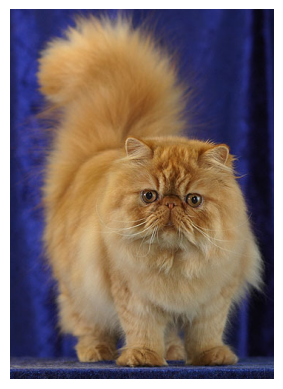

In [66]:
# 이미지 표현은 응용
import matplotlib.pyplot as plt
from PIL import Image # 이미지 처리 모듈 + 클래스
from io import BytesIO # 메모리의 데이터를 파일처럼 사용하는 도구 
import requests # urllib.request와 비슷한 기능을 수행하는 다른 모듈

response = requests.get(df_documents['image_url'][0])
if response.status_code == 200:
    image = Image.open(BytesIO(response.content)) # bytesIO로 파일처럼 만들어서 이미지를 열음
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    pass
else:
    print("error" + response.status_code)